<a href="https://colab.research.google.com/github/paragnayak/Data-Science/blob/master/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Problem Statement

The hospitals are evaluating the effeciency of insulin based treatment for patients. 
Recommend  if solo insulin treatments works well towards the above stated objective.
For a new patient, given his medical history anc characteristics, should we recommend solo insulin or a conjuction with other drugs/treatment

# Data Set Information:

The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.

(1)	It is an inpatient encounter (a hospital admission).

(2)	It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.

(3)	The length of stay was at least 1 day and at most 14 days.

(4)	Laboratory tests were performed during the encounter.

(5)	Medications were administered during the encounter.

The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [0]:
# Reading the xlsx file of the diabetic data.
dfd=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Unsupervised Learning Classification/Capstone Project/diabetic_data.xlsx') #readmitted is the target column

In [0]:
dfd.head()

,encounter_id,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [0]:
# Reading the xlsx file of the Admission Details data.
dfa=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Unsupervised Learning Classification/Capstone Project/admission_details.xlsx')

In [0]:
dfa.head()

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty
0,8222157,6,25,1,1,?,Pediatrics-Endocrinology
1,55629189,1,1,7,3,?,?
2,86047875,1,1,7,2,?,?
3,82442376,1,1,7,2,?,?
4,42519267,1,1,7,1,?,?


In [0]:
# Reading the xlsx file of the Diagnosis Session data.
dfds=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Unsupervised Learning Classification/Capstone Project/Diagnosis_session.xlsx')

In [0]:
dfds.head()


,patient_nbr,diag_1,diag_2,diag_3,number_diagnoses
0,8222157,250.83,?,?,1
1,55629189,276,250.01,255,9
2,86047875,648,250,V27,6
3,82442376,8,250.43,403,7
4,42519267,197,157,250,5


In [0]:
# Reading the xlsx file of the Patient Details data.
dfpd=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Unsupervised Learning Classification/Capstone Project/Paitent_details.xlsx')

In [0]:
dfpd.head()

,encounter_id,patient_nbr,race,gender,age,weight
0,2278392,8222157,Caucasian,Female,[0-10),?
1,149190,55629189,Caucasian,Female,[10-20),?
2,64410,86047875,AfricanAmerican,Female,[20-30),?
3,500364,82442376,Caucasian,Male,[30-40),?
4,16680,42519267,Caucasian,Male,[40-50),?


In [0]:
# Reading the xlsx file of the Lab Session data.
dfls=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Unsupervised Learning Classification/Capstone Project/Lab-session.xlsx')

In [0]:
dfls.head()

,encounter_id,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient
0,2278392,41,0,1,0,0,0
1,149190,59,0,18,0,0,0
2,64410,11,5,13,2,0,1
3,500364,44,1,16,0,0,0
4,16680,51,0,8,0,0,0


In [0]:
# Merging the Diabetic Data and lab session Dataset
df1=pd.merge(dfd,dfls, on='encounter_id', how='inner')

In [0]:
# Merging the Admission Details and Diagnostic Session Dataset
df2=pd.merge(dfa,dfds,on='patient_nbr',how='inner')

In [0]:
df1.head()

,encounter_id,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient
0,2278392,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,41,0,1,0,0,0
1,149190,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,59,0,18,0,0,0
2,64410,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,11,5,13,2,0,1
3,500364,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,44,1,16,0,0,0
4,16680,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,51,0,8,0,0,0


In [0]:
df2.head()

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,diag_1,diag_2,diag_3,number_diagnoses
0,8222157,6,25,1,1,?,Pediatrics-Endocrinology,250.83,?,?,1
1,55629189,1,1,7,3,?,?,276,250.01,255,9
2,86047875,1,1,7,2,?,?,648,250,V27,6
3,82442376,1,1,7,2,?,?,8,250.43,403,7
4,42519267,1,1,7,1,?,?,197,157,250,5


In [0]:
df3=pd.merge(df1,dfpd,on='encounter_id',how='inner')

In [0]:
df=pd.merge(df3,df2,on='patient_nbr',how='inner')

In [0]:
df.head()

,encounter_id,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,diag_1,diag_2,diag_3,number_diagnoses
0,2278392,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,41,0,1,0,0,0,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,250.83,?,?,1
1,149190,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,59,0,18,0,0,0,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,276,250.01,255,9
2,64410,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,11,5,13,2,0,1,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,648,250,V27,6
3,500364,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,44,1,16,0,0,0,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,8,250.43,403,7
4,16680,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,51,0,8,0,0,0,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,197,157,250,5


In [0]:
df['payer_code'].value_counts()

MC    381396
?     280096
HM    104857
BC     79047
SP     76779
MD     63234
OG     59973
UN     19406
CM     18941
DM     18192
CP     15922
OT      2529
PO      2439
MP      2108
SI       583
CH       469
WC       276
FR         1
Name: payer_code, dtype: int64

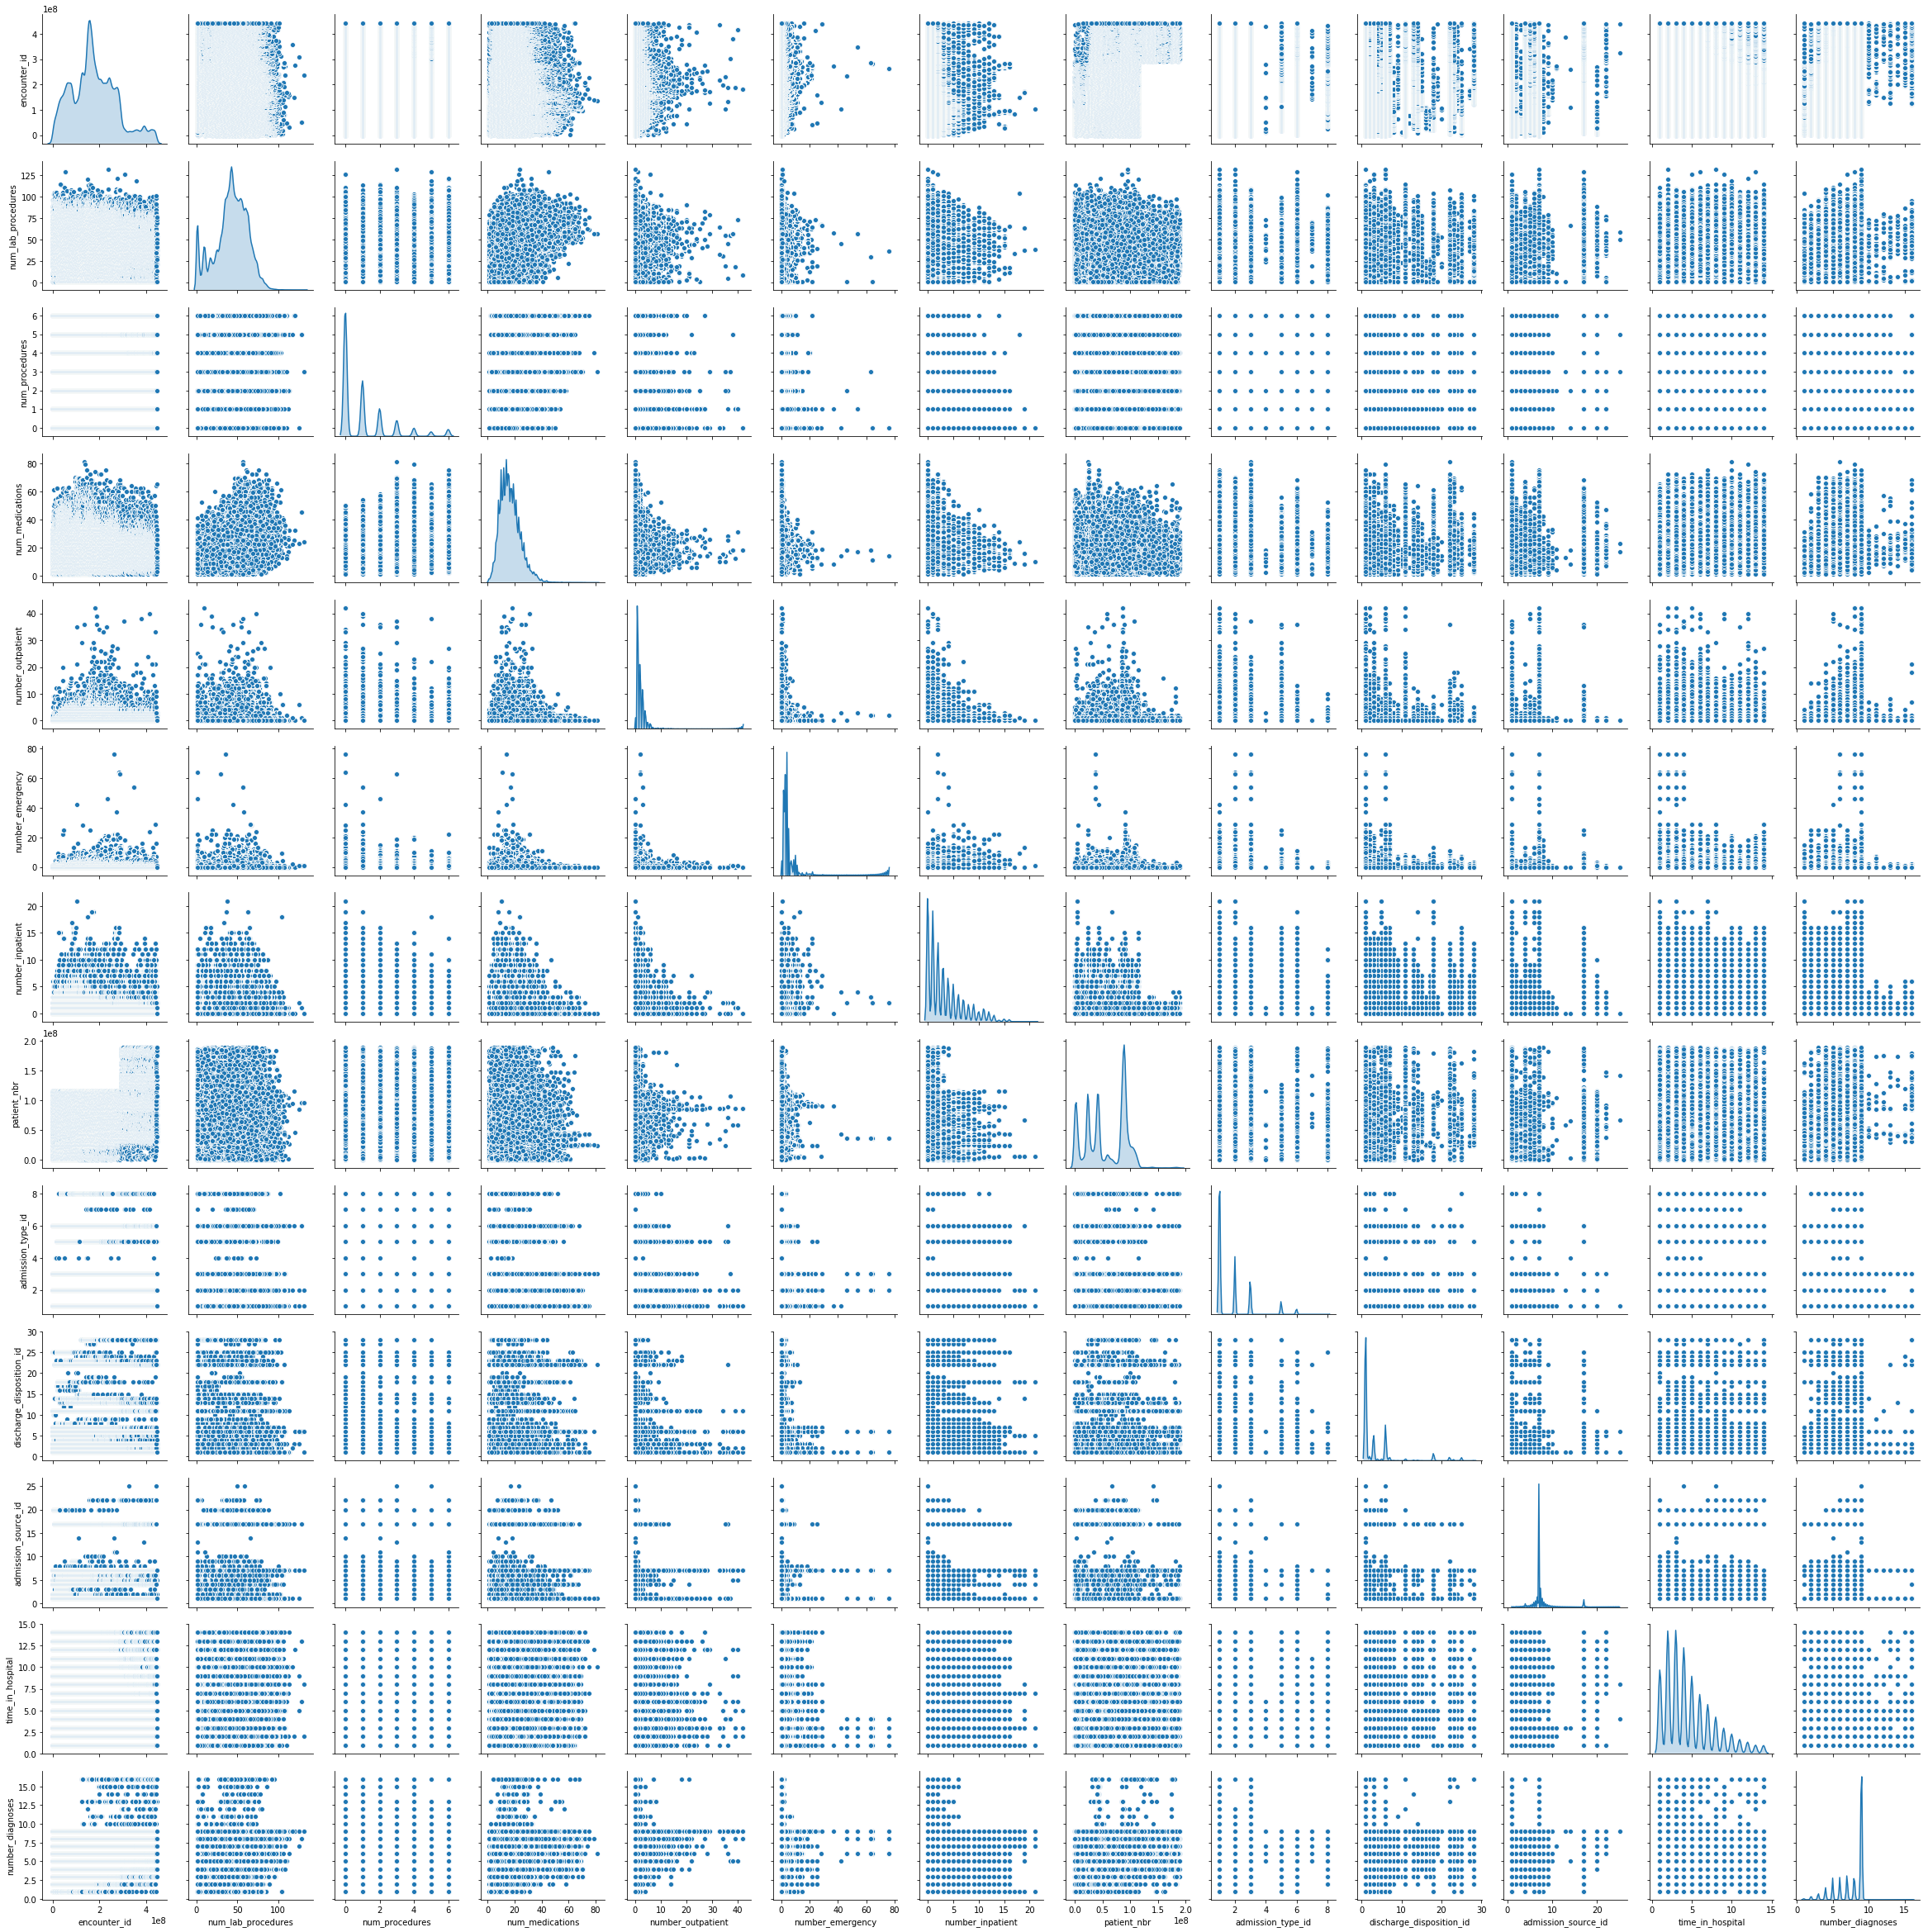

In [0]:
sns.pairplot(df,diag_kind='kde')

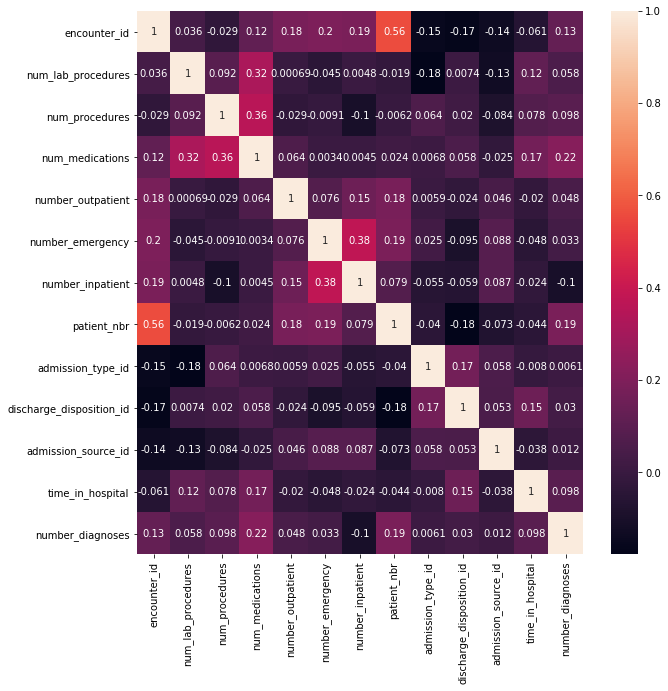

In [0]:
plt.figure(figsize=[10,10])
sns.heatmap(df.corr(),annot=True)
plt.show()

In [0]:
print(df.shape)

(1126248, 50)


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1126248 entries, 0 to 1126247
Data columns (total 50 columns):
encounter_id                1126248 non-null int64
max_glu_serum               1126248 non-null object
A1Cresult                   1126248 non-null object
metformin                   1126248 non-null object
repaglinide                 1126248 non-null object
nateglinide                 1126248 non-null object
chlorpropamide              1126248 non-null object
glimepiride                 1126248 non-null object
acetohexamide               1126248 non-null object
glipizide                   1126248 non-null object
glyburide                   1126248 non-null object
tolbutamide                 1126248 non-null object
pioglitazone                1126248 non-null object
rosiglitazone               1126248 non-null object
acarbose                    1126248 non-null object
miglitol                    1126248 non-null object
troglitazone                1126248 non-null object
tola

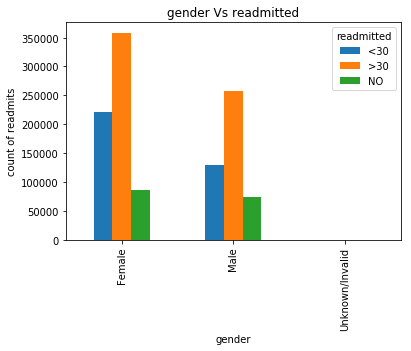

In [0]:
pd.crosstab(df.gender,df.readmitted).plot(kind='bar')
plt.title('gender Vs readmitted')
plt.xlabel('gender')
plt.ylabel('count of readmits')
plt.savefig('gender vs readmitted')

In [0]:
dfdd=df.drop_duplicates(subset=['patient_nbr'],keep='first')

In [0]:
print(dfdd.shape)

(71518, 50)


In [0]:
dfdd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71518 entries, 0 to 1126247
Data columns (total 50 columns):
encounter_id                71518 non-null int64
max_glu_serum               71518 non-null object
A1Cresult                   71518 non-null object
metformin                   71518 non-null object
repaglinide                 71518 non-null object
nateglinide                 71518 non-null object
chlorpropamide              71518 non-null object
glimepiride                 71518 non-null object
acetohexamide               71518 non-null object
glipizide                   71518 non-null object
glyburide                   71518 non-null object
tolbutamide                 71518 non-null object
pioglitazone                71518 non-null object
rosiglitazone               71518 non-null object
acarbose                    71518 non-null object
miglitol                    71518 non-null object
troglitazone                71518 non-null object
tolazamide                  71518 non-nu

In [0]:
# Descriptive Statistics

dfdd.describe()

,encounter_id,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,number_diagnoses
count,7.151800e+04,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,7.151800e+04,71518.000000,71518.000000,71518.000000,71518.00000,71518.000000
mean,1.568156e+08,43.075478,1.430577,15.705025,0.280069,0.103540,0.177829,5.505160e+07,2.100254,3.593235,5.657457,4.28913,7.245700
std,1.003769e+08,19.952338,1.759864,8.311163,1.068957,0.509187,0.603790,3.947573e+07,1.508301,5.269771,4.162580,2.94921,1.994674
min,1.252200e+04,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.350000e+02,1.000000,1.000000,1.000000,1.00000,1.000000
25%,8.145807e+07,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,2.337577e+07,1.000000,1.000000,1.000000,2.00000,6.000000
50%,1.440574e+08,44.000000,1.000000,14.000000,0.000000,0.000000,0.000000,4.816680e+07,1.000000,1.000000,7.000000,3.00000,8.000000
75%,2.155513e+08,57.000000,2.000000,20.000000,0.000000,0.000000,0.000000,8.752222e+07,3.000000,3.000000,7.000000,6.00000,9.000000
max,4.438672e+08,132.000000,6.000000,81.000000,42.000000,42.000000,12.000000,1.895026e+08,8.000000,28.000000,25.000000,14.00000,16.000000


In [0]:
# checking the missing values
dfdd.isnull().sum()

encounter_id                0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide                     0
citoglipton                 0
insulin                     0
glyburide-metformin         0
glipizide-metformin         0
glimepiride-pioglitazone    0
metformin-rosiglitazone     0
metformin-pioglitazone      0
change                      0
diabetesMed                 0
readmitted                  0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_eme

# Observations.

Here ,we can see that there are no null values

# Time in Hospital Vs Readmission

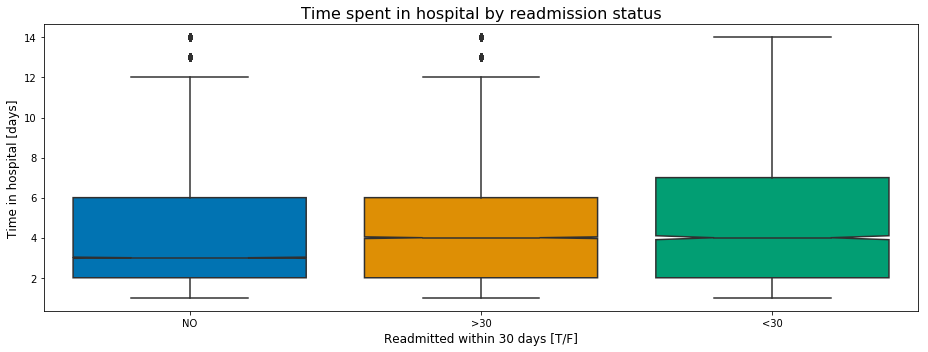

In [0]:
f = plt.figure(figsize=(13,5))
sns.boxplot(x='readmitted', y='time_in_hospital',
           data=dfdd, palette='colorblind', saturation=1, orient='v', notch=True)
plt.ylabel('Time in hospital [days]', size=12); plt.xlabel('Readmitted within 30 days [T/F]', size=12);
plt.title('Time spent in hospital by readmission status', size=16)
plt.tight_layout()

# Plotting the target Variable 'Readmit'


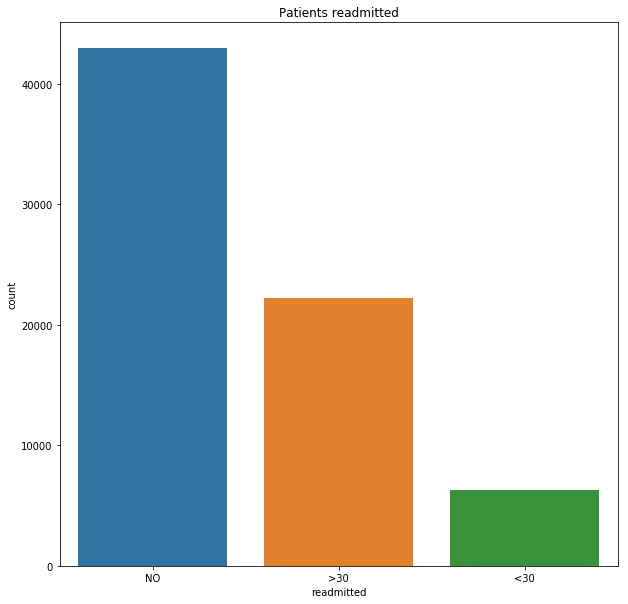

In [0]:
plt.figure(figsize=(10,10))
sns.countplot(dfdd.readmitted)
plt.title('Patients readmitted')
plt.show()

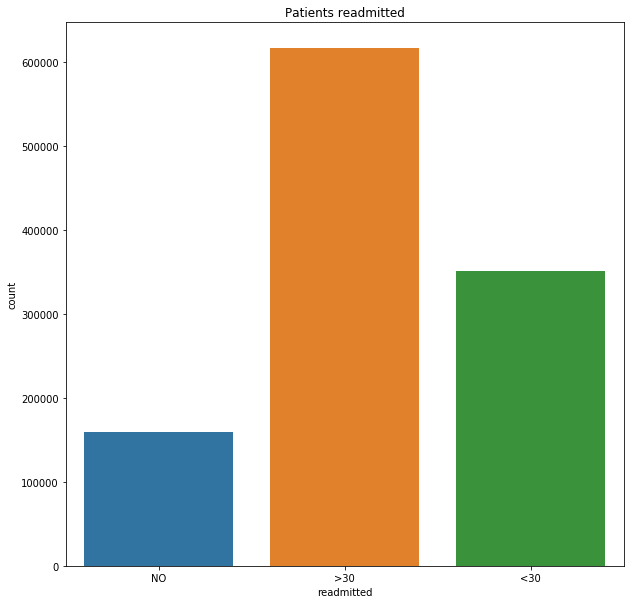

In [0]:
plt.figure(figsize=(10,10))
sns.countplot(df.readmitted)
plt.title('Patients readmitted')
plt.show()

# Observations

The difference here is quite immediately clear - patients that were readmitted tended to spend longer in hospital. As can be seen from the boxplot below, the difference in median time spent in hospital between the two readmission classes was about a day.

In [0]:
# count the number of rows for each type
dfdd.groupby('readmitted').size()

readmitted
<30     6293
>30    22240
NO     42985
dtype: int64

# Observations

The most important column here is readmitted, which tells us if a patient was hospitalized within 30 days, greater than 30 days or not readmitted.

In [0]:
# Another column that is important is discharge_disposition_id, which tells us where the patient went after the hospitalization.
dfdd.groupby('discharge_disposition_id').size()

discharge_disposition_id
1     44317
2      1539
3      8784
4       541
5       913
6      8289
7       409
8        73
9         9
10        6
11     1077
12        2
13      243
14      218
15       40
16        3
17        8
18     2474
19        6
20        1
22     1410
23      260
24       25
25      778
27        3
28       90
dtype: int64

In [0]:
dfdd = dfdd.loc[~df.discharge_disposition_id.isin([11,13,14,19,20,21])]

# Observations

If we look at the IDs_mapping.csv we can see that 11,13,14,19,20,21 are related to death or hospice. We should remove these samples from the predictive model.

In [0]:
dfdd['OUTPUT_LABEL'] = (dfdd.readmitted == '<30').astype('int')

# Observations

Now let's define an output variable for our binary classification. Here we will try to predict if a patient is likely to be re-admitted within 30 days of discharge.

# Observations

Let's define a function to calculate the prevalence of population that is readmitted with 30 days.

In [0]:
def calc_prevalence(y_actual):
    return (sum(y_actual)/len(y_actual))

In [0]:

print('Prevalence:%.3f'%calc_prevalence(dfdd['OUTPUT_LABEL'].values))

Prevalence:0.090


# Observations

Around 11% of the population is rehospitalized. This represented an imbalanced classification problem so we will address that below.

# To check for the Unique values

In [0]:
# for each column
for c in list(dfdd.columns):
    
    # get a list of unique values
    n = dfdd[c].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(c)
        print(n)
    else:
        print(c + ': ' +str(len(n)) + ' unique values')

encounter_id: 69973 unique values
max_glu_serum
['None' '>300' 'Norm' '>200']
A1Cresult
['None' '>7' '>8' 'Norm']
metformin
['No' 'Steady' 'Up' 'Down']
repaglinide
['No' 'Up' 'Steady' 'Down']
nateglinide
['No' 'Steady' 'Down' 'Up']
chlorpropamide
['No' 'Steady' 'Down' 'Up']
glimepiride
['No' 'Steady' 'Down' 'Up']
acetohexamide
['No' 'Steady']
glipizide
['No' 'Steady' 'Up' 'Down']
glyburide
['No' 'Steady' 'Up' 'Down']
tolbutamide
['No' 'Steady']
pioglitazone
['No' 'Steady' 'Up' 'Down']
rosiglitazone
['No' 'Steady' 'Up' 'Down']
acarbose
['No' 'Steady' 'Up']
miglitol
['No' 'Steady' 'Down' 'Up']
troglitazone
['No' 'Steady']
tolazamide
['No' 'Steady']
examide
['No']
citoglipton
['No']
insulin
['No' 'Up' 'Steady' 'Down']
glyburide-metformin
['No' 'Steady' 'Down' 'Up']
glipizide-metformin
['No' 'Steady']
glimepiride-pioglitazone
['No']
metformin-rosiglitazone
['No' 'Steady']
metformin-pioglitazone
['No' 'Steady']
change
['No' 'Ch']
diabetesMed
['No' 'Yes']
readmitted
['NO' '>30' '<30']
num_la

In [0]:
# To check for the missing values
for col in dfdd.columns:
   if dfdd[col].dtype == object:
        print(col,dfdd[col][dfdd[col] == '?'].count()/dfdd[col].count()*100)

max_glu_serum 0.0
A1Cresult 0.0
metformin 0.0
repaglinide 0.0
nateglinide 0.0
chlorpropamide 0.0
glimepiride 0.0
acetohexamide 0.0
glipizide 0.0
glyburide 0.0
tolbutamide 0.0
pioglitazone 0.0
rosiglitazone 0.0
acarbose 0.0
miglitol 0.0
troglitazone 0.0
tolazamide 0.0
examide 0.0
citoglipton 0.0
insulin 0.0
glyburide-metformin 0.0
glipizide-metformin 0.0
glimepiride-pioglitazone 0.0
metformin-rosiglitazone 0.0
metformin-pioglitazone 0.0
change 0.0
diabetesMed 0.0
readmitted 0.0
race 2.74105726494505
gender 0.0
age 0.0
weight 96.01560601946466
payer_code 43.466765752504536
medical_specialty 48.07425721349664
diag_1 0.014291226615980448
diag_2 0.4187329398482271
diag_3 1.7492461377960071


In [0]:
# dropping the  columns which has more than 23% missing values
dfdd=dfdd.drop(['weight','payer_code','medical_specialty'],axis=1)

In [0]:
print(dfdd.shape)

(69973, 48)


In [0]:
dfdd.columns

Index(['encounter_id', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'patient_nbr', 'race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'OUTPUT_LABEL'],
      dtype='object')

In [0]:
# to drop the missing values in the row  race, diag_1,diag_2,diag_3,gender
dfdd['race'] = dfdd['race'].replace('?', np.nan)
dfdd = dfdd.dropna(axis=0, subset=['race'])

In [0]:
dfdd['diag_1'] = dfdd['diag_1'].replace('?', np.nan)
dfdd = dfdd.dropna(axis=0, subset=['diag_1'])

In [0]:
dfdd['diag_2'] = dfdd['diag_2'].replace('?', np.nan)
dfdd = dfdd.dropna(axis=0, subset=['diag_2'])

In [0]:
dfdd['diag_3'] = dfdd['diag_3'].replace('?', np.nan)
dfdd = dfdd.dropna(axis=0, subset=['diag_3'])

In [0]:
dfdd['gender'] = dfdd['gender'].replace('?', np.nan)
dfdd = dfdd.dropna(axis=0, subset=['gender'])

In [0]:
print(dfdd.shape)

(66844, 48)


# Observations
variables (drugs named citoglipton and examide), all records have the same value. So essentially these cannot provide any interpretive or discriminatory information for predicting readmission so we decided to drop these two variables

# Feature Engineering

In [0]:
dfdd['service_utilization'] = dfdd['number_outpatient'] + dfdd['number_emergency'] + dfdd['number_inpatient']

In [0]:
dfdd["Race"]= dfdd["race"].map(lambda x:'NA' if x=='?' else x)
dfdd.drop(['race'], axis=1, inplace= True)

In [0]:
def get_fn(row):
    if row['admission_type_id']==1 or row['admission_type_id']==2 or row['admission_type_id']==7 :
        return "Non ELective"
    elif row['admission_type_id']==3 or row['admission_type_id']==4:
        return "Elective"
    else :
        return "NA"
dfdd['admission_type']= dfdd.apply(get_fn,axis=1)
dfdd.drop(['admission_type_id'], axis=1, inplace= True)

# Observations

admission_type_ids 1,2,7 are grouped as Non-Elective category 3,4 as Elective category and other ids which fall under missing information are grouped as 'NA'

In [0]:
def fun(z):
    if z =='None' or z=='Norm':
        return 1
    else :
        return 0
dfdd['A1C']= dfdd['A1Cresult'].map(fun)
dfdd.drop(['A1Cresult'], axis=1, inplace= True)

# Observartions

'None' & 'Norm' of A1C is 0 and >8,>7 is 1.

In [0]:
def gt_ag(a):
    if a =='[0-10)' or a=='[10-20)' or a=='[20-30)':
        return 'young'
    elif a =='[30-40)' or a=='[40-50)' or a=='[50-60)':
        return 'mid'
    else:
        return'old'
dfdd['Age']= dfdd['age'].map(gt_ag)
dfdd.drop(['age'], axis=1, inplace= True)

# Observations 
Dividing age groups in to three categories 'young','mid','old'

In [0]:
dfdd['max_glu_serum'].value_counts()

None    63619
Norm     1641
>200      903
>300      681
Name: max_glu_serum, dtype: int64

In [0]:
dfdd['max_glu_serum']=dfdd['max_glu_serum'].replace('None',0)
dfdd['max_glu_serum']=dfdd['max_glu_serum'].replace('Norm',0)
dfdd['max_glu_serum']=dfdd['max_glu_serum'].replace('>200',1)
dfdd['max_glu_serum']=dfdd['max_glu_serum'].replace('>300',1)

# Observations

'None' & 'Norm' of max_glu_serum is 0 and >200,>300 is 1

In [0]:
def dp_id(a):
    if a ==6 or a==8 or a==9 or a==13 or a==1:
        return 'Discharged Home'
    elif a==18 or a ==25 or a==26 :
        return 'NA'
    else:
        return'Discharged/Transferred'
dfdd['discharge']= dfdd['discharge_disposition_id'].map(dp_id)
dfdd.drop(['discharge_disposition_id'], axis=1, inplace= True)

In [0]:
dfdd.readmitted.value_counts()

NO     39249
>30    21521
<30     6074
Name: readmitted, dtype: int64

# Observations

The data contains variables for number of inpatient (admissions), emergency room visits and outpatient visits for a given patient in the previous one year. These are (crude) measures of how much hospital/clinic services a person has used in the past year. We added these three to create a new variable called service utilization (see figure below). The idea was to see which version gives us better results.

In [0]:
dfdd = dfdd[(dfdd.diag_1 != '?') | (dfdd.diag_2 != '?') | (dfdd.diag_3 != '?')]

In [0]:
# Creating additional columns for diagnosis
dfdd['d1'] = dfdd['diag_1']
dfdd['d2'] = dfdd['diag_2']
dfdd['d3'] = dfdd['diag_3']


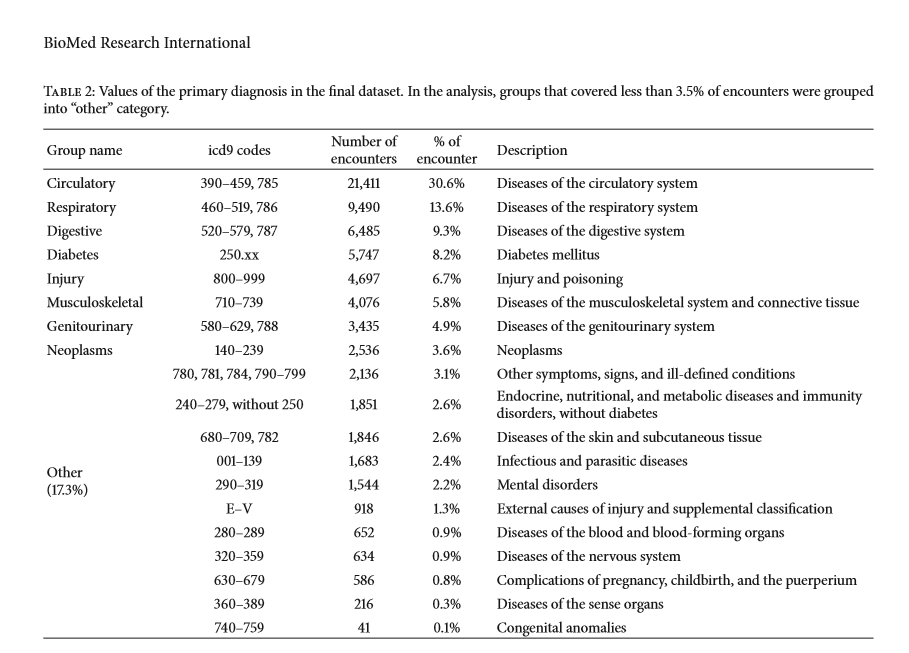

In [0]:
# Inserting the images to classify The diagnosis
from IPython.display import Image
Image('/content/drive/My Drive/Colab Notebooks/Unsupervised Learning Classification/Capstone Project/__results___20_0.png')

# Observations

I was concerned about how weak each of the ICD9 diagnoses would be as one-hot encoded features - there simply weren't enough entries for most values to make an informed decision about whether they were influencing readmission. Instead, I aggregated the diagnoses under a broader class in accordance with the type of health problems each range of values relates to.

In [0]:

def ICD9_classifier(diagnoses):
    # Returns a series of strings corresponding to type of ICD9 diagnosis
    # diagnoses is a list
    gr_diagnoses = diagnoses.copy()
    icd9_dct = {
                'Infectious':(1, 139),
                'Neoplasmic':(140,239),
                'Hormonal':(240, 279),
                'Blood':(280,289),
                'Mental':(290,319),
                'Nervous':(320,359),
                'Sensory':(360,389),
                'Circulatory':(390,459),
                'Respiratory':(460,519),
                'Digestive':(520,579),
                'Genitourinary':(580,629),
                'Childbirth':(630,679),
                'Dermatological':(680,709),
                'Musculoskeletal':(710,739),
                'Congenital':(740,759),
                'Perinatal':(760,779),
                'Miscellaneous':(780,799),
                'Injury':(800,999)
               }
    for i, diagnosis in enumerate(diagnoses):
        if (str(diagnoses[i])[0] == 'E') or (str(diagnoses[i])[0] == 'V'):
            gr_diagnoses[i] = 'Accidental'
        elif (str(diagnoses[i]).lower() == 'nan'):
            gr_diagnoses[i] = 'NaN'
        else:
            for key, icd_range in icd9_dct.items():
                if (int(float(diagnoses[i])) >= icd_range[0]) and (int(float(diagnoses[i])) <= icd_range[1]):
                    gr_diagnoses[i] = key
    return gr_diagnoses

In [0]:

dfdd['d1'] = ICD9_classifier(dfdd.diag_1.values)
dfdd['d2'] = ICD9_classifier(dfdd.diag_2.values)
dfdd['d3'] = ICD9_classifier(dfdd.diag_3.values)

In [0]:
print(dfdd.shape)

(66844, 52)


In [0]:
print(dfdd.shape)

(66844, 52)


In [0]:
dfdd.head()

,encounter_id,max_glu_serum,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,patient_nbr,gender,admission_source_id,time_in_hospital,diag_1,diag_2,diag_3,number_diagnoses,OUTPUT_LABEL,service_utilization,Race,admission_type,A1C,Age,discharge,d1,d2,d3
1,149190,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,59,0,18,0,0,0,55629189,Female,7,3,276,250.01,255,9,0,0,Caucasian,Non ELective,1,young,Discharged Home,Hormonal,Hormonal,Hormonal
2,64410,0,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,11,5,13,2,0,1,86047875,Female,7,2,648,250,V27,6,0,3,AfricanAmerican,Non ELective,1,young,Discharged Home,Childbirth,Hormonal,Accidental
3,500364,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,44,1,16,0,0,0,82442376,Male,7,2,8,250.43,403,7,0,0,Caucasian,Non ELective,1,mid,Discharged Home,Infectious,Hormonal,Circulatory
4,16680,0,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,51,0,8,0,0,0,42519267,Male,7,1,197,157,250,5,0,0,Caucasian,Non ELective,1,mid,Discharged Home,Neoplasmic,Neoplasmic,Hormonal
5,35754,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30,31,6,16,0,0,0,82637451,Male,2,3,414,411,250,9,0,0,Caucasian,Non ELective,1,mid,Discharged Home,Circulatory,Circulatory,Hormonal


In [0]:
dfdd = dfdd[dfdd.gender != 'Unknown/Invalid']

In [0]:
dfdd=dfdd.drop(['encounter_id','patient_nbr'],axis=1)

In [0]:
dfdd.drop(['chlorpropamide','acetohexamide', 'tolbutamide', 'rosiglitazone', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'glyburide-metformin', 'glipizide-metformin','glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone'],axis=1, inplace= True)

# Dummification



# Observations

Creating dummy encoded columns for categorical variables

To avoid dummy variable trap i.e., scenario of highly correlated independent variables we have to drop one of the created dummy variable. The Original column should also be dropped as we have dummies

In [0]:
dummy_metformin = pd.get_dummies(dfdd['metformin'], prefix='metformin')
dfdd= dfdd.join(dummy_metformin.drop("metformin_No", axis=1))
dfdd.drop(['metformin'], axis=1, inplace= True)

In [0]:
dummy_repaglinide = pd.get_dummies(dfdd['repaglinide'], prefix='repaglinide')
dfdd= dfdd.join(dummy_repaglinide.drop("repaglinide_No", axis=1))
dfdd.drop(['repaglinide'], axis=1, inplace= True)

In [0]:
dummy_insulin = pd.get_dummies(dfdd['insulin'], prefix='insulin')
dfdd= dfdd.join(dummy_insulin.drop("insulin_No", axis=1))
dfdd.drop(['insulin'], axis=1, inplace= True)

In [0]:
dummy_nateglinide = pd.get_dummies(dfdd['nateglinide'], prefix='nateglinide')
dfdd= dfdd.join(dummy_nateglinide.drop("nateglinide_No", axis=1))
dfdd.drop(['nateglinide'], axis=1, inplace= True)

In [0]:
dummy_glimepiride = pd.get_dummies(dfdd['glimepiride'], prefix='glimepiride')
dfdd= dfdd.join(dummy_glimepiride.drop("glimepiride_No", axis=1))
dfdd.drop(['glimepiride'], axis=1, inplace= True)

In [0]:
dummy_glipizide = pd.get_dummies(dfdd['glipizide'], prefix='glipizide')
dfdd= dfdd.join(dummy_glipizide.drop("glipizide_No", axis=1))
dfdd.drop(['glipizide'], axis=1, inplace= True)

In [0]:
dummy_glyburide = pd.get_dummies(dfdd['glyburide'], prefix='glyburide')
dfdd= dfdd.join(dummy_glyburide.drop("glyburide_No", axis=1))
dfdd.drop(['glyburide'], axis=1, inplace= True)

In [0]:
dummy_pioglitazone = pd.get_dummies(dfdd['pioglitazone'], prefix='pioglitazone')
dfdd= dfdd.join(dummy_pioglitazone.drop("pioglitazone_No", axis=1))
dfdd.drop(['pioglitazone'], axis=1, inplace= True)

In [0]:
dummy_acarbose = pd.get_dummies(dfdd['acarbose'], prefix='acarbose')
dfdd= dfdd.join(dummy_acarbose.drop("acarbose_No", axis=1))
dfdd.drop(['acarbose'], axis=1, inplace= True)

In [0]:
dummy_gender = pd.get_dummies(dfdd['gender'], prefix='gender')
dfdd= dfdd.join(dummy_gender.drop("gender_Female", axis=1))
dfdd.drop(['gender'], axis=1, inplace= True)

In [0]:
dummy_admission = pd.get_dummies(dfdd['admission_type'], prefix='admission')
dfdd= dfdd.join(dummy_admission.drop("admission_NA", axis=1))
dfdd.drop(['admission_type'], axis=1, inplace= True)

In [0]:
dummy_change = pd.get_dummies(dfdd['change'], prefix='change')
dfdd= dfdd.join(dummy_change.drop("change_Ch", axis=1))
dfdd.drop(['change'], axis=1, inplace= True)

In [0]:
dummy_Age = pd.get_dummies(dfdd['Age'], prefix='Age')
dfdd= dfdd.join(dummy_Age.drop("Age_mid", axis=1))
dfdd.drop(['Age'], axis=1, inplace= True)

In [0]:
dummy_diabetesMed = pd.get_dummies(dfdd['diabetesMed'], prefix='diabetesMed')
dfdd= dfdd.join(dummy_diabetesMed.drop("diabetesMed_No", axis=1))
dfdd.drop(['diabetesMed'], axis=1, inplace= True)

In [0]:
dummy_race = pd.get_dummies(dfdd['Race'], prefix='Race')
dfdd= dfdd.join(dummy_race.drop("Race_Other", axis=1))
dfdd.drop(['Race'], axis=1, inplace= True)

In [0]:
dfdd.discharge.value_counts()

Discharged Home           50177
Discharged/Transferred    13514
NA                         3152
Name: discharge, dtype: int64

In [0]:
dummy_discharge = pd.get_dummies(dfdd['discharge'], prefix='discharge')
dfdd= dfdd.join(dummy_discharge.drop("discharge_NA", axis=1))
dfdd.drop(['discharge'], axis=1, inplace= True)

In [0]:
dfdd.head()

,max_glu_serum,readmitted,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,admission_source_id,time_in_hospital,diag_1,diag_2,diag_3,number_diagnoses,OUTPUT_LABEL,service_utilization,A1C,d1,d2,d3,metformin_Down,metformin_Steady,metformin_Up,repaglinide_Down,repaglinide_Steady,repaglinide_Up,insulin_Down,insulin_Steady,insulin_Up,nateglinide_Down,nateglinide_Steady,nateglinide_Up,glimepiride_Down,glimepiride_Steady,glimepiride_Up,glipizide_Down,glipizide_Steady,glipizide_Up,glyburide_Down,glyburide_Steady,glyburide_Up,pioglitazone_Down,pioglitazone_Steady,pioglitazone_Up,acarbose_Steady,acarbose_Up,gender_Male,admission_Elective,admission_Non ELective,change_No,Age_old,Age_young,diabetesMed_Yes,Race_AfricanAmerican,Race_Asian,Race_Caucasian,Race_Hispanic,discharge_Discharged Home,discharge_Discharged/Transferred
1,0,>30,59,0,18,0,0,0,7,3,276,250.01,255,9,0,0,1,Hormonal,Hormonal,Hormonal,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0
2,0,NO,11,5,13,2,0,1,7,2,648,250,V27,6,0,3,1,Childbirth,Hormonal,Accidental,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,0,1,0
3,0,NO,44,1,16,0,0,0,7,2,8,250.43,403,7,0,0,1,Infectious,Hormonal,Circulatory,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0
4,0,NO,51,0,8,0,0,0,7,1,197,157,250,5,0,0,1,Neoplasmic,Neoplasmic,Hormonal,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0
5,0,>30,31,6,16,0,0,0,2,3,414,411,250,9,0,0,1,Circulatory,Circulatory,Hormonal,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,1,0,1,0


In [0]:
dfdd.drop(['diag_1','diag_2','diag_3'], axis=1, inplace= True)

In [0]:
# Dummies of the categorical variables

dfdd=pd.get_dummies(dfdd,prefix=['d1','d2','d3'],columns=['d1','d2','d3'])

In [0]:
dfdd.head()

,max_glu_serum,readmitted,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,admission_source_id,time_in_hospital,number_diagnoses,OUTPUT_LABEL,service_utilization,A1C,metformin_Down,metformin_Steady,metformin_Up,repaglinide_Down,repaglinide_Steady,repaglinide_Up,insulin_Down,insulin_Steady,insulin_Up,nateglinide_Down,nateglinide_Steady,nateglinide_Up,glimepiride_Down,glimepiride_Steady,glimepiride_Up,glipizide_Down,glipizide_Steady,glipizide_Up,glyburide_Down,glyburide_Steady,glyburide_Up,pioglitazone_Down,pioglitazone_Steady,pioglitazone_Up,acarbose_Steady,acarbose_Up,...,d1_Neoplasmic,d1_Nervous,d1_Respiratory,d1_Sensory,d2_Accidental,d2_Blood,d2_Childbirth,d2_Circulatory,d2_Congenital,d2_Dermatological,d2_Digestive,d2_Genitourinary,d2_Hormonal,d2_Infectious,d2_Injury,d2_Mental,d2_Miscellaneous,d2_Musculoskeletal,d2_Neoplasmic,d2_Nervous,d2_Respiratory,d2_Sensory,d3_Accidental,d3_Blood,d3_Childbirth,d3_Circulatory,d3_Congenital,d3_Dermatological,d3_Digestive,d3_Genitourinary,d3_Hormonal,d3_Infectious,d3_Injury,d3_Mental,d3_Miscellaneous,d3_Musculoskeletal,d3_Neoplasmic,d3_Nervous,d3_Respiratory,d3_Sensory
1,0,>30,59,0,18,0,0,0,7,3,9,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,NO,11,5,13,2,0,1,7,2,6,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,NO,44,1,16,0,0,0,7,2,7,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,NO,51,0,8,0,0,0,7,1,5,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,0,>30,31,6,16,0,0,0,2,3,9,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [0]:
X=dfdd.drop('readmitted',axis=1)
y=dfdd['readmitted']


In [0]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import accuracy_score,f1_score
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier 

In [0]:
dtree=DecisionTreeClassifier()
rfc=RandomForestClassifier()
knn=KNeighborsClassifier()
nb=GaussianNB()
rfc_model=RandomForestClassifier(n_estimators=10,max_depth=25,min_samples_split=3)
bg=BaggingClassifier()
adb=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
xgb=XGBClassifier()

In [0]:
models = []
models.append(('Decision Tree Classifier', dtree))
models.append(('Random Forrest Classifer', rfc))
models.append(('K Neighbors Classifer', knn))
models.append(('Naive Bayes Classifer', nb))
models.append(('Random Forrest Classifier with Estimators 10',rfc_model))
models.append(('Bagging Classifer', bg))
models.append(('Ada Boost Classifer', adb))
models.append(('Gradient Boosting Classifer', gbc))
models.append(('XGBoost Classifer', xgb))


Decision Tree Classifier: 0.598701 (0.000217)
Random Forrest Classifer: 0.631794 (0.000444)
K Neighbors Classifer: 0.524707 (0.000287)
Naive Bayes Classifer: 0.588289 (0.000750)
Random Forrest Classifier with Estimators 10: 0.662702 (0.000872)
Bagging Classifer: 0.624433 (0.000581)
Ada Boost Classifer: 0.680281 (0.001672)
Gradient Boosting Classifer: 0.681777 (0.001782)
XGBoost Classifer: 0.683064 (0.001902)


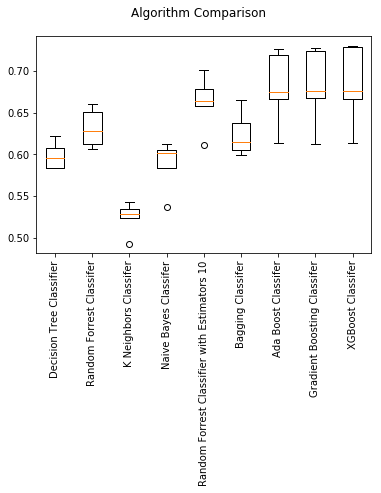

In [0]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=5,random_state=123)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.var())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xticks(rotation=90)
ax.set_xticklabels(names)
plt.show()

# Grid Search and Randomised Search

In [0]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

# Auto ML


In [0]:
! pip install h2o


     |████████████████████████████████| 123.6MB 167kB/s 
  Created wheel for h2o: filename=h2o-3.26.0.3-py2.py3-none-any.whl size=123649955 sha256=b75a70aee1eaef60df3698512115e68d6f1ebffa7afcde8aad55f2a5b7d03bb5
  Stored in directory: /root/.cache/pip/wheels/4a/a6/8d/0880c51d5aa9746a87f61d9b66d8a98e7b9cf400c81ffc944e
Successfully built h2o


In [0]:
import h2o

In [0]:
from h2o.automl import H2OAutoML

In [0]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.4" 2019-07-16; OpenJDK Runtime Environment (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3); OpenJDK 64-Bit Server VM (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp1mxzsp6q
  JVM stdout: /tmp/tmp1mxzsp6q/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp1mxzsp6q/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.3
H2O cluster version age:,4 days
H2O cluster name:,H2O_from_python_unknownUser_zg3oq3
H2O cluster total nodes:,1
H2O cluster free memory:,3 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


In [0]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [0]:
hc=H2OGradientBoostingEstimator()

In [0]:
# Use local data file or download from GitHub
import os
docker_data_path = dfdd
if os.path.isfile(docker_data_path):
  data_path = docker_data_path
else:
  data_path = dfdd


# Load data into H2O
dfh = h2o.import_file(data_path)

TypeError: ignored

In [0]:
y = "readmitted"

In [0]:
splits = dfh.split_frame(ratios = [0.8], seed = 1)
train = splits[0]
test = splits[1]

NameError: ignored